<a href="https://colab.research.google.com/github/ayanoglu/Logistic-Regression-from-Scratch/blob/main/LogisticRegressionFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import csv
import math
import matplotlib.pyplot as plt
from decimal import *
from google.colab import files
uploaded = files.upload()

Saving hw1_dataset.csv to hw1_dataset.csv


In [27]:
import io
FDS = pd.read_csv(io.BytesIO(uploaded['hw1_dataset.csv']))
FDS.head()   

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [33]:
FDS1 = pd.DataFrame.to_numpy(FDS)
FDS1[1:5,0:14]

array([[ 67. ,   1. ,   4. , 160. , 286. ,   0. ,   2. , 108. ,   1. ,
          1.5,   2. ,   3. ,   3. ,   1. ],
       [ 67. ,   1. ,   4. , 120. , 229. ,   0. ,   2. , 129. ,   1. ,
          2.6,   2. ,   2. ,   7. ,   1. ],
       [ 37. ,   1. ,   3. , 130. , 250. ,   0. ,   0. , 187. ,   0. ,
          3.5,   3. ,   0. ,   3. ,   0. ],
       [ 41. ,   0. ,   2. , 130. , 204. ,   0. ,   2. , 172. ,   0. ,
          1.4,   1. ,   0. ,   3. ,   0. ]])

In [36]:
FDS1[:, :-1].mean(axis = 0)

array([5.45833333e+01, 6.80000000e-01, 3.15666667e+00, 1.31770000e+02,
       2.46876667e+02, 1.43333333e-01, 9.93333333e-01, 1.49383333e+02,
       3.30000000e-01, 1.06366667e+00, 1.60666667e+00, 6.93333333e-01,
       4.73666667e+00])

In [37]:
FDS1[:, :-1].std(axis = 0)

array([ 9.02679653,  0.46647615,  0.96200601, 17.73594561, 51.97385358,
        0.35041246,  0.99328859, 22.90334158,  0.47021272,  1.17043292,
        0.61532286,  0.95181698,  1.93407744])

In [40]:
FDS1[:, :-1] = (FDS1[:, :-1] - FDS1[:, :-1].mean(axis = 0)) / FDS1[:, :-1].std(axis = 0)
FDS1[1:5,0:14]

array([[ 1.37553413,  0.68599434,  0.8766404 ,  1.59168282,  0.75275029,
        -0.40904178,  1.01346847, -1.8068688 ,  1.42488702,  0.37279653,
         0.63923081,  2.4234351 , -0.89793026,  1.        ],
       [ 1.37553413,  0.68599434,  0.8766404 , -0.66362405, -0.343955  ,
        -0.40904178,  1.01346847, -0.88997203,  1.42488702,  1.31261972,
         0.63923081,  1.37281295,  1.17023925,  1.        ],
       [-1.94790403,  0.68599434, -0.16285415, -0.09979733,  0.06009432,
        -0.40904178, -1.00004505,  1.64240954, -0.70181003,  2.08156597,
         2.2643939 , -0.72843136, -0.89793026,  0.        ],
       [-1.50477894, -1.45773797, -1.2023487 , -0.09979733, -0.82496609,
        -0.40904178,  1.01346847,  0.98748327, -0.70181003,  0.28735806,
        -0.98593227, -0.72843136, -0.89793026,  0.        ]])

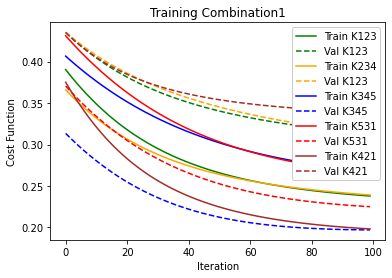

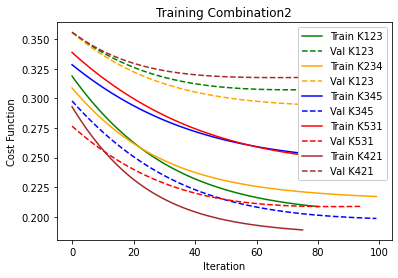

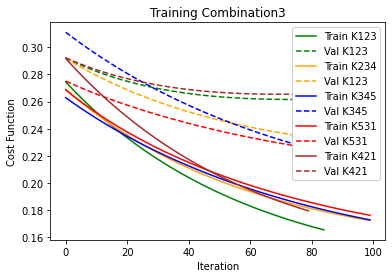

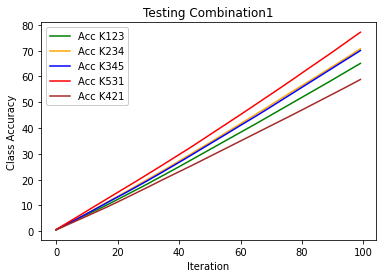

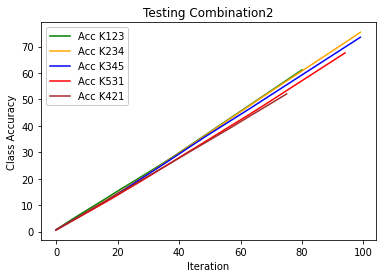

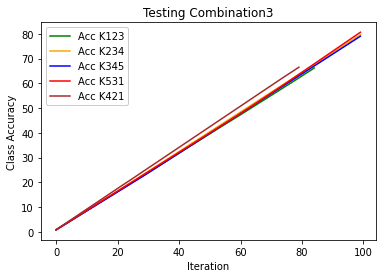

In [41]:
x0 = np.transpose(np.ones(300))
FDSsffl = np.column_stack((x0,FDS1))

np.random.shuffle(FDSsffl)

K1 = FDSsffl[0:60]
K2 = FDSsffl[60:120]
K3 = FDSsffl[120:180]
K4 = FDSsffl[180:240]
K5 = FDSsffl[240:300]
 
K1x = K1[0:60, 0:14]
K2x = K2[0:60, 0:14]
K3x = K3[0:60, 0:14]
K4x = K4[0:60, 0:14]
K5x = K5[0:60, 0:14]

K1y = K1[0:60, 14:15]
K2y = K2[0:60, 14:15]
K3y = K3[0:60, 14:15]
K4y = K4[0:60, 14:15]
K5y = K5[0:60, 14:15]

def sigm(TTR, X)    :
    
    res = []
    for i in range(len(X)):
        res.append(1 / (1 + np.exp(-(np.dot(TTR, (X[i]))))))
        
    return res
    

def GradDesc(KTRx, KTRy, Collection, KVLx, KVLy, KTSx, KTSy):
    T0 = T1 = T2 = T3 = T4 = T5 = T6 = T7 = T8 = T9 = T10 = T11 = T12 = T13 = 1   
    T0n = T1n = T2n = T3n = T4n = T5n = T6n = T7n = T8n = T9n = T10n = T11n = T12n = T13n = 0
    iteration = 0
    breakcounter = 0
    Jprev = 0
    Jprint = []
    Jval = []
    TestAcc = []
    m=180
    vl=60
    ts=60
    acc = 0
    alpha = 0.1
    TTR = [T0, T1, T2, T3, T4, T5, T6, T7, T8, T9, T10, T11, T12, T13]
    TTRn = [T0n, T1n, T2n, T3n, T4n, T5n, T6n, T7n, T8n, T9n, T10n, T11n, T12n, T13n]
    #Ji = -(1/300) * sum([(KTRy[i][0]) * math.log10(1 / (1 + math.exp(-(np.dot(TTR, (KTRx[i])))))) + (1 - (KTRy[i][0])) * math.log10( 1 - (1 / (1 + math.exp(-(np.dot(TTR, (KTRx[i]))))))) for i in range(m)]) 
    
    while ((iteration < 100) and (breakcounter < 10)): 
        for j in Collection:
                #TTRn[j] = TTR[j] + alpha * (1/180) * sum([(KTRy[i][0] - (1 / (1 + math.exp(-(np.dot(TTR, (KTRx[i])))))) * KTRx[i][j]) for i in range(m)])
                #TTRn[j] = TTR[j] + alpha * (1/180) * sum([((KTRy[i][0] - (1 / (1 + math.exp(-(np.dot(TTR, (KTRx[i]))))))) * KTRx[i][j]) for i in range(m)])
                ht= sigm(TTR, KTRx)
                TTRn[j] = TTR[j] + alpha * (1/180) * sum([((KTRy[i][0] - (ht[i])) * KTRx[i][j]) for i in range(m)])
        
        for i in range(0, len(TTR)):
            TTR[i] = TTRn[i]
        iteration += 1
        
        
        htn= sigm(TTR, KTRx)
        J  = -(1/180) * sum([(((KTRy[i][0]) * math.log10((htn[i]))) + ((1 - (KTRy[i][0])) * math.log10( 1 - ((htn[i]))))) for i in range(m)]) 
        htv= (sigm(TTR, KVLx))
        JVL = -(1/60) * sum([(((KVLy[i][0]) * math.log10((htv[i]))) + ((1 - (KVLy[i][0])) * math.log10( 1 - ((htv[i]))))) for i in range(vl)]) 
        
        htt1=(sigm(TTR, KTSx))
        htt = [round(num) for num in htt1]
        
        for i in range(0, len(htt)):
            if (htt[i] == KTSy[i]):
                acc += 1
        T= acc / 60
        
        if JVL > Jprev:
            breakcounter += 1
                    
        Jprev = JVL
        Jprint.append(J) 
        Jval.append(JVL)
        TestAcc.append(T)
        
    return [Jprint, Jval, TestAcc, htt]

Collection1 = [1, 3, 5, 7, 8] 
Collection2 = [1,2,3,4,5,6]
Collection3 = [1,2,3,4,5,6,7,8,9,10,11,12,13]

K123x = np.vstack((K1x,K2x,K3x))
K123y = np.vstack((K1y,K2y,K3y))
KTSx = K4x
KTSy = K4y
KVLx = K5x
KVLy = K5y
SOLC1_123 = GradDesc(K123x, K123y, Collection1, KVLx, KVLy, KTSx, KTSy)
JC1_123 = SOLC1_123[0]
JC1VL_123 = SOLC1_123[1]
JC1TS_123 = SOLC1_123[2]
JC1_123TTR = SOLC1_123[3]

K234x = np.vstack((K2x,K3x,K4x))
K234y = np.vstack((K2y,K3y,K4y))
KTSx = K1x
KTSy = K1y
KVLx = K5x
KVLy = K5y
SOLC1_234 = GradDesc(K234x, K234y, Collection1, KVLx, KVLy, KTSx, KTSy)
JC1_234 = SOLC1_234[0]
JC1VL_234 = SOLC1_234[1]
JC1TS_234 = SOLC1_234[2]
JC1_234TTR = SOLC1_234[3]

K345x = np.vstack((K3x,K4x,K5x))
K345y = np.vstack((K3y,K4y,K5y))
KTSx = K1x
KTSy = K1y
KVLx = K2x
KVLy = K2y
SOLC1_345 = GradDesc(K345x, K345y, Collection1, KVLx, KVLy, KTSx, KTSy)
JC1_345 = SOLC1_345[0]
JC1VL_345 = SOLC1_345[1]
JC1TS_345 = SOLC1_345[2]
JC1_345TTR = SOLC1_345[3]

K531x = np.vstack((K5x,K3x,K1x))
K531y = np.vstack((K5y,K3y,K1y))
KTSx = K2x
KTSy = K2y
KVLx = K4x
KVLy = K4y
SOLC1_531 = GradDesc(K531x, K531y, Collection1, KVLx, KVLy, KTSx, KTSy)
JC1_531 = SOLC1_531[0]
JC1VL_531 = SOLC1_531[1]
JC1TS_531 = SOLC1_531[2]
JC1_531TTR = SOLC1_531[3]

K421x = np.vstack((K4x,K2x,K1x))
K421y = np.vstack((K4y,K2y,K1y))
KTSx = K3x
KTSy = K3y
KVLx = K5x
KVLy = K5y
SOLC1_421 = GradDesc(K421x, K421y, Collection1, KVLx, KVLy, KTSx, KTSy)
JC1_421 = SOLC1_421[0]
JC1VL_421 = SOLC1_421[1]
JC1TS_421 = SOLC1_421[2]
JC1_421TTR = SOLC1_421[3]

plt.plot(JC1_123, color='green', label="Train K123")
plt.plot(JC1VL_123, color='green', label="Val K123", linestyle='dashed')
plt.plot(JC1_234, color='orange', label="Train K234")
plt.plot(JC1VL_234, color='orange', label="Val K123", linestyle='dashed')
plt.plot(JC1_345, color='blue', label = "Train K345")
plt.plot(JC1VL_345, color='blue', label="Val K345", linestyle='dashed')
plt.plot(JC1_531, color='red', label = "Train K531")
plt.plot(JC1VL_531, color='red', label="Val K531", linestyle='dashed')
plt.plot(JC1_421, color='brown', label = "Train K421")
plt.plot(JC1VL_421, color='brown', label="Val K421", linestyle='dashed')
plt.ylabel('Cost Function')
plt.xlabel('Iteration')
plt.legend(framealpha=1, frameon=True);
plt.title('Training Combination1')
plt.show()
 
K123x = np.vstack((K1x,K2x,K3x))
K123y = np.vstack((K1y,K2y,K3y))
KTSx = K4x
KTSy = K4y
KVLx = K5x
KVLy = K5y
SOLC2_123 = GradDesc(K123x, K123y, Collection2, KVLx, KVLy, KTSx, KTSy)
JC2_123 = SOLC2_123[0]
JC2VL_123 = SOLC2_123[1]
JC2TS_123 = SOLC2_123[2]
JC2_123TTR = SOLC2_123[3]

K234x = np.vstack((K2x,K3x,K4x))
K234y = np.vstack((K2y,K3y,K4y))
KTSx = K1x
KTSy = K1y
KVLx = K5x
KVLy = K5y
SOLC2_234 = GradDesc(K234x, K234y, Collection2, KVLx, KVLy, KTSx, KTSy)
JC2_234 = SOLC2_234[0]
JC2VL_234 = SOLC2_234[1]
JC2TS_234 = SOLC2_234[2]
JC2_234TTR = SOLC2_234[3]

K345x = np.vstack((K3x,K4x,K5x))
K345y = np.vstack((K3y,K4y,K5y))
KTSx = K1x
KTSy = K1y
KVLx = K2x
KVLy = K2y
SOLC2_345 = GradDesc(K345x, K345y, Collection2, KVLx, KVLy, KTSx, KTSy)
JC2_345 = SOLC2_345[0]
JC2VL_345 = SOLC2_345[1]
JC2TS_345 = SOLC2_345[2]
JC2_345TTR = SOLC2_345[3]

K531x = np.vstack((K5x,K3x,K1x))
K531y = np.vstack((K5y,K3y,K1y))
KTSx = K2x
KTSy = K2y
KVLx = K4x
KVLy = K4y
SOLC2_531 = GradDesc(K531x, K531y, Collection2, KVLx, KVLy, KTSx, KTSy)
JC2_531 = SOLC2_531[0]
JC2VL_531 = SOLC2_531[1]
JC2TS_531 = SOLC2_531[2]
JC2_531TTR = SOLC2_531[3]

K421x = np.vstack((K4x,K2x,K1x))
K421y = np.vstack((K4y,K2y,K1y))
KTSx = K3x
KTSy = K3y
KVLx = K5x
KVLy = K5y
SOLC2_421 = GradDesc(K421x, K421y, Collection2, KVLx, KVLy, KTSx, KTSy)
JC2_421 = SOLC2_421[0]
JC2VL_421 = SOLC2_421[1]
JC2TS_421 = SOLC2_421[2]
JC2_421TTR = SOLC2_421[3]

plt.plot(JC2_123, color='green', label="Train K123")
plt.plot(JC2VL_123, color='green', label="Val K123", linestyle='dashed')
plt.plot(JC2_234, color='orange', label="Train K234")
plt.plot(JC2VL_234, color='orange', label="Val K123", linestyle='dashed')
plt.plot(JC2_345, color='blue', label = "Train K345")
plt.plot(JC2VL_345, color='blue', label="Val K345", linestyle='dashed')
plt.plot(JC2_531, color='red', label = "Train K531")
plt.plot(JC2VL_531, color='red', label="Val K531", linestyle='dashed')
plt.plot(JC2_421, color='brown', label = "Train K421")
plt.plot(JC2VL_421, color='brown', label="Val K421", linestyle='dashed')
plt.ylabel('Cost Function')
plt.xlabel('Iteration')
plt.legend(framealpha=1, frameon=True);
plt.title('Training Combination2')
plt.show()
    
K123x = np.vstack((K1x,K2x,K3x))
K123y = np.vstack((K1y,K2y,K3y))
KTSx = K4x
KTSy = K4y
KVLx = K5x
KVLy = K5y
SOLC3_123 = GradDesc(K123x, K123y, Collection3, KVLx, KVLy, KTSx, KTSy)
JC3_123 = SOLC3_123[0]
JC3VL_123 = SOLC3_123[1]
JC3TS_123 = SOLC3_123[2]
JC3_123TTR = SOLC3_123[3]

K234x = np.vstack((K2x,K3x,K4x))
K234y = np.vstack((K2y,K3y,K4y))
KTSx = K1x
KTSy = K1y
KVLx = K5x
KVLy = K5y
SOLC3_234 = GradDesc(K234x, K234y, Collection3, KVLx, KVLy, KTSx, KTSy)
JC3_234 = SOLC3_234[0]
JC3VL_234 = SOLC3_234[1]
JC3TS_234 = SOLC3_234[2]
JC3_234TTR = SOLC3_234[3]

K345x = np.vstack((K3x,K4x,K5x))
K345y = np.vstack((K3y,K4y,K5y))
KTSx = K1x
KTSy = K1y
KVLx = K2x
KVLy = K2y
SOLC3_345 = GradDesc(K345x, K345y, Collection3, KVLx, KVLy, KTSx, KTSy)
JC3_345 = SOLC3_345[0]
JC3VL_345 = SOLC3_345[1]
JC3TS_345 = SOLC3_345[2]
JC3_345TTR = SOLC3_345[3]

K531x = np.vstack((K5x,K3x,K1x))
K531y = np.vstack((K5y,K3y,K1y))
KTSx = K2x
KTSy = K2y
KVLx = K4x
KVLy = K4y
SOLC3_531 = GradDesc(K531x, K531y, Collection3, KVLx, KVLy, KTSx, KTSy)
JC3_531 = SOLC3_531[0]
JC3VL_531 = SOLC3_531[1]
JC3TS_531 = SOLC3_531[2]
JC3_531TTR = SOLC3_531[3]

K421x = np.vstack((K4x,K2x,K1x))
K421y = np.vstack((K4y,K2y,K1y))
KTSx = K3x
KTSy = K3y
KVLx = K5x
KVLy = K5y
SOLC3_421 = GradDesc(K421x, K421y, Collection3, KVLx, KVLy, KTSx, KTSy)
JC3_421 = SOLC3_421[0]
JC3VL_421 = SOLC3_421[1]
JC3TS_421 = SOLC3_421[2]
JC3_421TTR = SOLC3_421[3]


plt.plot(JC3_123, color='green', label="Train K123")
plt.plot(JC3VL_123, color='green', label="Val K123", linestyle='dashed')
plt.plot(JC3_234, color='orange', label="Train K234")
plt.plot(JC3VL_234, color='orange', label="Val K123", linestyle='dashed')
plt.plot(JC3_345, color='blue', label = "Train K345")
plt.plot(JC3VL_345, color='blue', label="Val K345", linestyle='dashed')
plt.plot(JC3_531, color='red', label = "Train K531")
plt.plot(JC3VL_531, color='red', label="Val K531", linestyle='dashed')
plt.plot(JC3_421, color='brown', label = "Train K421")
plt.plot(JC3VL_421, color='brown', label="Val K421", linestyle='dashed')
plt.ylabel('Cost Function')
plt.xlabel('Iteration')
plt.legend(framealpha=1, frameon=True);
plt.title('Training Combination3')
plt.show()
    
plt.plot(JC1TS_123, label = "Acc K123", color='green')
plt.plot(JC1TS_234, label = "Acc K234", color='orange')
plt.plot(JC1TS_345, label = "Acc K345", color='blue')
plt.plot(JC1TS_531, label = "Acc K531", color='red')
plt.plot(JC1TS_421, label = "Acc K421", color='brown')
plt.ylabel('Class Accuracy')
plt.xlabel('Iteration')
plt.title('Testing Combination1')
plt.legend(framealpha=1, frameon=True);
plt.show() 

plt.plot(JC2TS_123, label = "Acc K123", color='green')
plt.plot(JC2TS_234, label = "Acc K234", color='orange')
plt.plot(JC2TS_345, label = "Acc K345", color='blue')
plt.plot(JC2TS_531, label = "Acc K531", color='red')
plt.plot(JC2TS_421, label = "Acc K421", color='brown')
plt.ylabel('Class Accuracy')
plt.xlabel('Iteration')
plt.title('Testing Combination2')
plt.legend(framealpha=1, frameon=True);
plt.show() 

plt.plot(JC3TS_123, label = "Acc K123", color='green')
plt.plot(JC3TS_234, label = "Acc K234", color='orange')
plt.plot(JC3TS_345, label = "Acc K345", color='blue')
plt.plot(JC3TS_531, label = "Acc K531", color='red')
plt.plot(JC3TS_421, label = "Acc K421", color='brown')
plt.ylabel('Class Accuracy')
plt.xlabel('Iteration')
plt.title('Testing Combination3')
plt.legend(framealpha=1, frameon=True);
plt.show() 
